In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
df = pd.read_csv('heart_disease_cleaned.csv')

In [19]:
df

,age,systolic_pressure,diastolic_pressure,physical_activity,smoking,diabetes,alcohol,total_cholesterol,heart_disease
0,69,112,83,2,1,151,0,208,1
1,32,197,84,0,0,118,0,205,1
2,78,184,75,1,1,239,0,168,1
3,38,185,75,1,1,191,0,247,1
4,41,103,65,0,1,238,0,167,1
...,...,...,...,...,...,...,...,...,...
5264,79,152,100,2,1,177,0,195,1
5265,18,128,85,1,0,135,0,223,0
5266,29,169,87,2,0,200,1,244,1
5267,21,158,60,0,1,110,0,288,1


In [20]:
## divide features in Independent and dependent features
x=df.drop('heart_disease',axis=1)
y=df['heart_disease']

In [21]:
## train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
x_train.shape,x_test.shape

((4215, 8), (1054, 8))

In [23]:
## feature selection based on correlation
x_train.corr()

,age,systolic_pressure,diastolic_pressure,physical_activity,smoking,diabetes,alcohol,total_cholesterol
age,1.000000,0.001557,0.009526,0.012849,0.009440,0.010213,-0.004451,0.012372
systolic_pressure,0.001557,1.000000,0.013326,-0.002477,-0.001467,-0.012669,-0.000092,-0.007909
diastolic_pressure,0.009526,0.013326,1.000000,0.018781,0.004455,-0.008442,0.010613,-0.007298
physical_activity,0.012849,-0.002477,0.018781,1.000000,0.029513,0.007579,0.011755,0.006867
smoking,0.009440,-0.001467,0.004455,0.029513,1.000000,-0.010058,0.009502,0.003000
diabetes,0.010213,-0.012669,-0.008442,0.007579,-0.010058,1.000000,-0.009077,0.004619
alcohol,-0.004451,-0.000092,0.010613,0.011755,0.009502,-0.009077,1.000000,-0.035118
total_cholesterol,0.012372,-0.007909,-0.007298,0.006867,0.003000,0.004619,-0.035118,1.000000


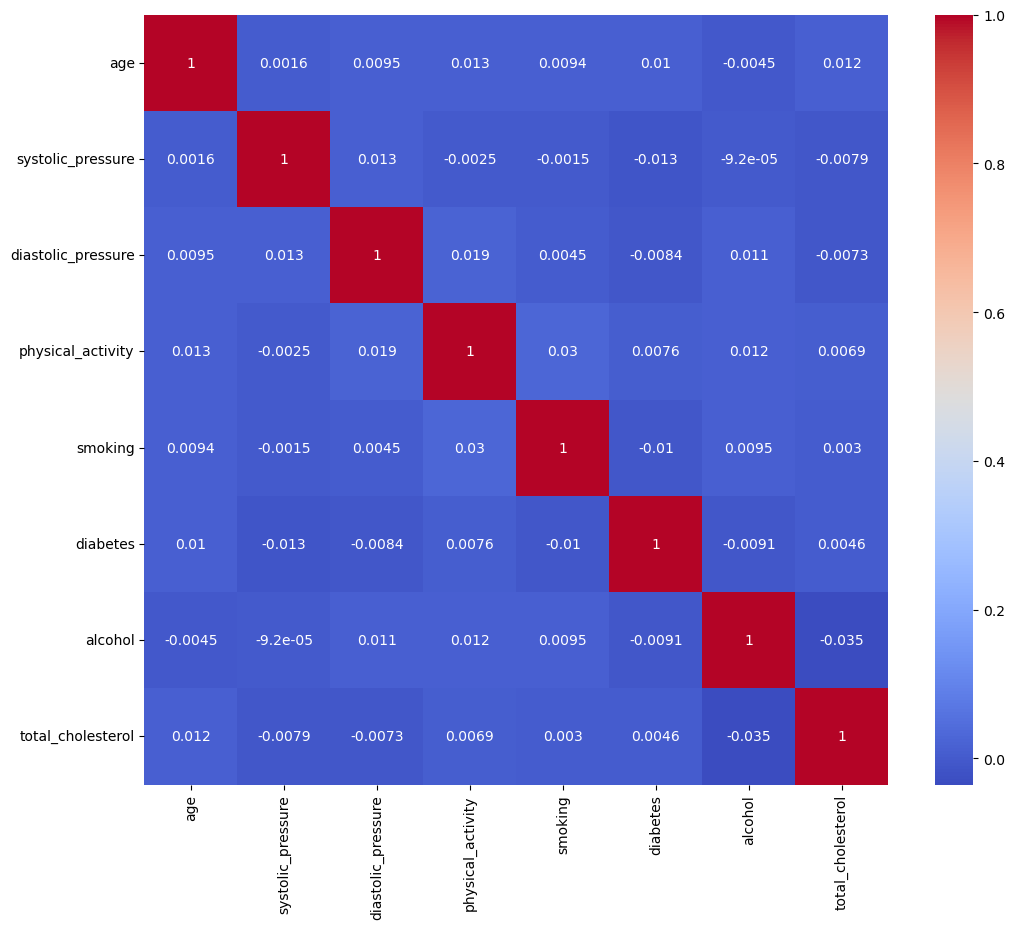

In [24]:
## check for multicollinearity
plt.figure(figsize=(12,10))
corr=x_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

A small note

in this data there are no corellation so all my features will be selected if i had 2 features which are highly corralated i would drop any one of thoese

In [25]:
## feature scaling or Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [26]:
x_train_scaled

array([[-0.40249091, -1.10170119,  1.12514059, ...,  0.64418335,
        -1.03796822, -0.42267908],
       [-1.40539957, -0.75660852,  0.27111895, ...,  1.06991424,
        -1.03796822,  0.39364597],
       [ 1.55054175, -0.44602511, -1.43692435, ..., -0.33342093,
         0.96342064,  0.91312556],
       ...,
       [ 1.55054175, -1.13621045,  0.27111895, ..., -0.68031277,
        -1.03796822,  0.22048611],
       [-1.14147624,  0.62376217, -0.75370703, ..., -1.32679302,
         0.96342064,  1.20997103],
       [ 0.33649442,  1.03787337, -0.15589188, ..., -0.94836555,
        -1.03796822, -1.43690112]], shape=(4215, 8))

Text(0.5, 1.0, 'After Scaling')

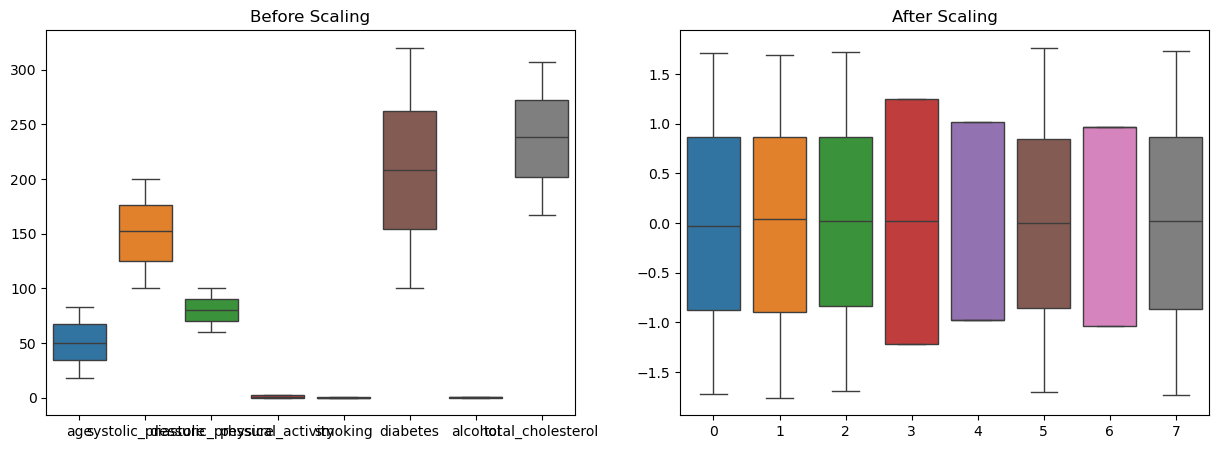

In [27]:
## box plot to check for understanding the scaling effect
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('After Scaling')

## Linear Regression Model

Mean Absolute Error: 0.05503182910118028
R2 score: 0.23296522812196618


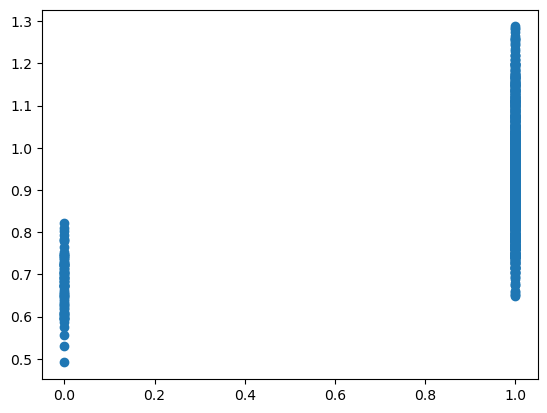

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_squared_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('R2 score:',score)

plt.scatter(y_test,y_pred)


We will not use regression in this project we will be using classification


Accuracy: 0.9563567362428842
Confusion Matrix:
 [[ 54  28]
 [ 18 954]]


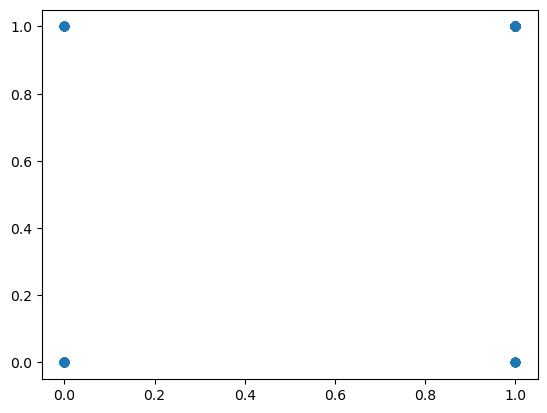

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg=LogisticRegression()
logreg.fit(x_train_scaled,y_train)
y_pred=logreg.predict(x_test_scaled)
acc=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print('Accuracy:',acc)
print('Confusion Matrix:\n',cm)

plt.scatter(y_test,y_pred)


## PICKLE THE CLASSIFICATION MODELS, PREPROCESSING MODEL STANDARDSCALER

In [30]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [31]:
import pickle
## pickle.dump(scaler,open('scaler.pkl','wb'))
## pickle.dump(logreg,open('logistic.pkl','wb'))